In [159]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy

In [160]:
## load .npy data
X = np.load('../data/X_example.npy',allow_pickle=True)
X.shape

(45, 100)

In [161]:
X

array([[0.22489321, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7751068 , 0.38622263, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.61377734, 0.54755205, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [172]:
def construct_X(M, alphas, Np=None):
    '''
    Np - # sensors
    N - # Np * No = len(alphas) * Np
    M - tomogram size
    D - M * M
    '''
    if Np is None:
        Np = int(np.ceil(np.sqrt(2) * M))
    
    D = M * M
    N = len(alphas) * Np
    
    C = np.mgrid[0:M, 0:M]
    print(type(C))
    C = np.array([C[1],C[0]])
    C = C.reshape(2, -1)
    print("C shape is: ", C[0])
    
    i_indices = []
    j_indices = []
    weights = []
    
    for idx, alpha in enumerate(alphas):
        rad = np.deg2rad(alpha)
        n = np.array([np.cos(rad), np.sin(rad)])
        
        p = n.T @ C
        
        p += Np / 2  # shift to center sensor array
        # print("Shape of p is: ", p.shape) ## proiectia tuturor coordonatelor tomografului de MxM flattened pe normala data de alpha curent
        
        # print("P is ", p)

        ip_floor = np.floor(p).astype(int)
        ip_ceil = np.ceil(p).astype(int)
        
        valid_indices = (ip_floor >= 0) & (ip_floor < Np)
        valid_indices &= (ip_ceil >= 0) & (ip_ceil < Np)

        ip_floor = ip_floor[valid_indices]
        ip_ceil = ip_ceil[valid_indices]

        # print("-----")
        # print(ip_floor[0])
        # print(ip_ceil[0])

        pixel_indices = np.arange(D)[valid_indices]
        
        w_floor = 1 - (p[valid_indices] - ip_floor)
        w_ceil = 1 - w_floor

        print("W floor is: ", w_floor)
        
        i_indices.extend((ip_floor + idx * Np).tolist())
        j_indices.extend(pixel_indices.tolist())
        weights.extend(w_floor.tolist())
        
        i_indices.extend((ip_ceil + idx * Np).tolist())
        j_indices.extend(pixel_indices.tolist())
        weights.extend(w_ceil.tolist())

    # X = scipy.sparse.coo_matrix((weights[::-1], (i_indices[::-1], j_indices[::-1])), shape=(N, D), dtype=np.float32)
    X = scipy.sparse.coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype=np.float32)
    
    return X

<class 'numpy.ndarray'>
C shape is:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
W floor is:  [0.5        0.66132943 0.82265886 0.9839883  0.14531773 0.30664716
 0.46797659 0.62930602 0.04463904 0.20596847 0.3672979  0.52862733
 0.68995676 0.8512862  0.01261563 0.17394506 0.33527449 0.58927807
 0.7506075  0.91193693 0.07326637 0.2345958  0.39592523 0.55725466
 0.71858409 0.87991353 0.04124296 0.13391711 0.29524654 0.45657597
 0.6179054  0.77923483 0.94056427 0.1018937  0.26322313 0.42455256
 0.58588199 0.67855614 0.83988557 0.001215   0.16254444 0.32387387
 0.4852033  0.64653273 0.80786216 0.9691916  0.13052103 0.22319518
 0.38452461 0.54585404 0.70718347 0.8685129  0.02984234 0.19117177
 0.3525012  0.51383063 0.67516006 0.76783421 0.92916364 0.09049307
 0.25182251 0.41315194 0.57448137 0.7358108  0.89714023 0.05846967
 0.219799

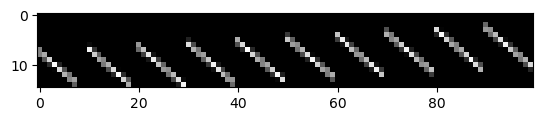

In [173]:
design_matrix = construct_X(10, [-33],15)
## convert to dense numpy array
design_matrix = design_matrix.toarray()
print(design_matrix.shape)
plt.imshow(design_matrix, cmap='gray')

(45, 100)


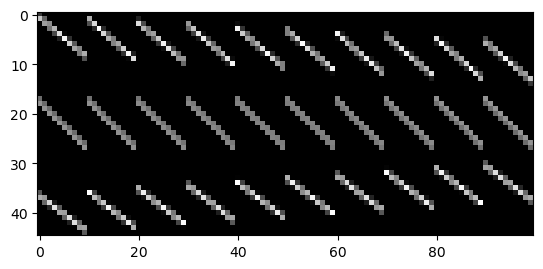

In [164]:
print(X.shape)
plt.imshow(X, cmap='gray')